# Training Time

In [1]:
import glob
from pprint import pprint
import pickle

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from slice_generator import slice_generator

In [2]:
print("tensorflow version:",tf.__version__)

tensorflow version: 2.2.0-dlenv


## Model variables

In [3]:
frames = 1
channels = 1
pixels_x = 21
pixels_y = 21

## Load the model

In [4]:
model_dir = "../models/"
models_list = sorted(glob.glob(model_dir+"*.h5"))
pprint(models_list)

['../models/full_stack_1f_1c_21x_21y.h5',
 '../models/full_stack_1f_1c_21x_21y_1.h5',
 '../models/t_full_stack_1f_1c_21x_21y.h5']


In [11]:
# choose a model
file_index = 0
models_list[file_index]
model_name = 'full_stack_1f_1c_21x_21y' # todo: use regex to parse filename

In [12]:
model = tf.keras.models.load_model(models_list[file_index])
model.summary()

Model: "Full_stack"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
model_input (InputLayer)        [(None, 2, 1, 21, 21 0                                            
__________________________________________________________________________________________________
tf_op_layer_unstack_1 (TensorFl [(None, 1, 21, 21),  0           model_input[0][0]                
__________________________________________________________________________________________________
gaussian_noise_1 (GaussianNoise (None, 1, 21, 21)    0           tf_op_layer_unstack_1[0][0]      
__________________________________________________________________________________________________
convB1 (Conv2D)                 (None, 8, 9, 9)      208         tf_op_layer_unstack_1[0][1]      
_________________________________________________________________________________________

## Check model history

In [13]:
model.history

## Prepare for training

In [14]:
train_file_path = "../data/train"
valid_file_path = "../data/validate"
vars_           = ['t2m']
proc_type       = "convlstm"
# 3 years of training data = 
train_steps = 2 * 365 * 24 / frames
# 1 year of validation data = 
valid_steps = 1 * 365 * 24 / frames

## Train and save

In [15]:
epochs = 1

In [ ]:
model.fit(
    slice_generator(img_dir=train_file_path, slice_size=frames, 
                    vars_=vars_, proc_type=proc_type,
                    pixels_x=pixels_x, pixels_y=pixels_y, debug=False
                    ),
    steps_per_epoch = train_steps,
    epochs = epochs,
    verbose = 1,
    shuffle = False,
#     initial_epoch = 1,
    validation_steps = valid_steps,
    validation_data = slice_generator(img_dir=valid_file_path, slice_size=frames,
                                      vars_=vars_, proc_type=proc_type,
                                      pixels_x=pixels_x, pixels_y=pixels_y, debug=False
                                      ),
)

tf.keras.models.save_model(
        model = model,
        filepath = '../models/t_'+model_name+'_2yrs.h5',
        overwrite=True,
        include_optimizer=True,
        save_format='tf',
        signatures=None
)


   38/17520 [..............................] - ETA: 38:34 - loss: 78.2906 - accuracy: 0.0464 - mean_absolute_error: 219.8483

## get training and validation loss

In [18]:
model_history = model.history.history

In [19]:
model_history

{'loss': [89.49191284179688],
 'accuracy': [0.019664600491523743],
 'mean_absolute_error': [257.2484130859375],
 'val_loss': [78.8266372680664],
 'val_accuracy': [0.018917156383395195],
 'val_mean_absolute_error': [226.6572265625]}

## Plot loss over epochs

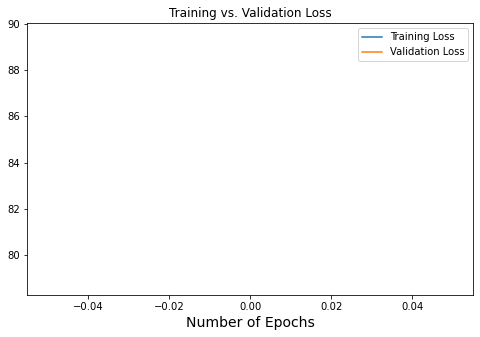

FileNotFoundError: [Errno 2] No such file or directory: '../img/epoch_loss.png'

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

train_loss = model_history['loss']
val_loss = model_history['val_loss']
plt.figure(figsize=(8, 5))
plt.title("Training vs. Validation Loss")
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Number of Epochs", size=14)
plt.legend()
plt.show()
plt.savefig("../img/epoch_loss.png",transparent=True, format="png")

## Visually Inspect Prediction

In [ ]:
slice_val = slice_generator(img_dir=valid_file_path, slice_size=frames, vars_=vars_,
                     proc_type=proc_type, pixels_x=pixels_x, pixels_y=pixels_y, debug=False
                     )

In [ ]:
in_, out_ = next(slice_val)
in_.shape

In [ ]:
test_pred= model.predict(in_, verbose=1)
test_pred